In [1]:
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
from urllib.request import urlopen

url_base = 'https://movie.naver.com/'
url_sub = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20180711'

page = urlopen(url_base + url_sub)
soup = BeautifulSoup(page, 'html.parser')
soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20180711" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta cont

In [3]:
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=169240" title="아일라">아일라</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=167787" title="허스토리">허스토리</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10173" title="사랑과 영혼">사랑과 영혼</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10050" title="싸이코">싸이코</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=16601" title="바그다드 카페 : 디렉터스컷">바그다드 카페 : 디렉터스컷</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=136315" title="어벤져스: 인피니티 워">어벤져스: 인피니티 워</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=168017" title="아이 필 프리티">아이 필 프리티</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=143416" title="미드나잇 선">미드나잇 선</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=159311" title="소공녀">소공녀</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=103719" title="그렇게 아버지가 된다">그렇게 아

In [13]:
soup.find('div','tit5').a.string

'아일라'

In [15]:
soup.find('td','point').string

'9.58'

In [19]:
date = pd.date_range('2018-04-04', periods = 100, freq='D')
date

DatetimeIndex(['2018-04-04', '2018-04-05', '2018-04-06', '2018-04-07',
               '2018-04-08', '2018-04-09', '2018-04-10', '2018-04-11',
               '2018-04-12', '2018-04-13', '2018-04-14', '2018-04-15',
               '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19',
               '2018-04-20', '2018-04-21', '2018-04-22', '2018-04-23',
               '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27',
               '2018-04-28', '2018-04-29', '2018-04-30', '2018-05-01',
               '2018-05-02', '2018-05-03', '2018-05-04', '2018-05-05',
               '2018-05-06', '2018-05-07', '2018-05-08', '2018-05-09',
               '2018-05-10', '2018-05-11', '2018-05-12', '2018-05-13',
               '2018-05-14', '2018-05-15', '2018-05-16', '2018-05-17',
               '2018-05-18', '2018-05-19', '2018-05-20', '2018-05-21',
               '2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25',
               '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29',
      

In [20]:
import urllib
from tqdm import tqdm_notebook

In [23]:
movie_date=[]
movie_name=[]
movie_point=[]

for today in tqdm_notebook(date):
    html = url_base + 'movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    responce = urlopen(html.format(date = urllib.parse.quote(today.strftime('%Y%m%d'))))
    soup = BeautifulSoup(responce,'html.parser')
    end = len(soup.find_all('td','point'))
    movie_date.extend([today for n in range(0,end)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0,end)])

In [24]:
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie['point'] = movie['point'].astype(float)
movie.head()

,date,name,point
0,2018-04-04,원더,9.40
1,2018-04-04,위대한 쇼맨,9.38
2,2018-04-04,사운드 오브 뮤직,9.37
3,2018-04-04,빌리 엘리어트,9.28
4,2018-04-04,코코,9.22


In [28]:
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc = np.sum)
movie_best = movie_unique.sort_values(by='point', ascending = False)
movie_best.head()

,point
name,
소공녀,892.90
위대한 쇼맨,815.73
어벤져스: 인피니티 워,709.64
"안녕, 나의 소울메이트",706.37
킹 오브 프리즘 프라이드 더 히어로,676.08


In [44]:
tmp = movie.query('name == ["아일라"]')
tmp

,date,name,point
3415,2018-06-25,아일라,9.53
3449,2018-06-26,아일라,9.55
3486,2018-06-27,아일라,9.54
3535,2018-06-28,아일라,9.55
3585,2018-06-29,아일라,9.53
3635,2018-06-30,아일라,9.54
3684,2018-07-01,아일라,9.55
3731,2018-07-02,아일라,9.50
3777,2018-07-03,아일라,9.51
3822,2018-07-04,아일라,9.55


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

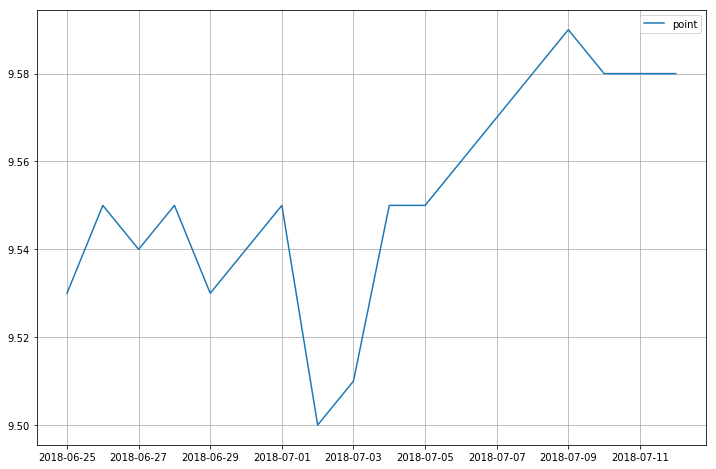

In [46]:
plt.figure(figsize = (12,8))
plt.plot(tmp['date'],tmp['point'])
plt.legend(loc='best')
plt.grid()
plt.show()

In [48]:
movie_pivot = pd.pivot_table(movie, index=['date'],columns = ['name'], values=['point'])
movie_pivot.head()

point                                                           \
name       12 솔져스 120BPM  4등 50가지 그림자: 해방 7년의 밤 B급 며느리 개들의 섬 걸어도 걸어도   게이트   
date                                                                         
2018-04-04   8.85   2.62 NaN         8.09  6.08   8.50   NaN     NaN  3.93   
2018-04-05   8.83   2.62 NaN         8.09  6.06   8.49   NaN     NaN  3.92   
2018-04-06   8.83   2.62 NaN         8.08  6.05   8.47   NaN     NaN  3.92   
2018-04-07   8.83   2.63 NaN         8.08  6.03   8.45   NaN     NaN  3.92   
2018-04-08   8.83   2.63 NaN         8.08  5.99   8.43   NaN     NaN  3.90   

                          ...                                       \
name       경성학교: 사라진 소녀들  ...  폭스캐처 프렌즈: 몬스터 섬의 비밀 플로리다 프로젝트 피터 래빗   
date                      ...                                        
2018-04-04           NaN  ...   NaN           8.89      8.49   NaN   
2018-04-05           NaN  ...   NaN           8.89      8.50   NaN   
2018-04-06           NaN  ...   NaN           8.89      8.51   NaN   
2018-04-07           NaN  ...   NaN           8.89      8.51   NaN   
2018-04-08           NaN  ...   NaN           8.89      8.52   NaN   

                                                                         
name       하이 스피드! –프리! 스타팅 데이즈 한 솔로: 스타워즈 스토리 허리케인 하이스트 허스토리 현기증 환상의 빛  
date                                                                     
2018-04-04                  NaN            NaN       7.7  NaN NaN   NaN  
2018-04-05                  NaN            NaN       NaN  NaN NaN   NaN  
2018-04-06                  NaN            NaN       NaN  NaN NaN   NaN  
2018-04-07                  NaN            NaN       NaN  NaN NaN   NaN  
2018-04-08                  NaN            NaN       NaN  NaN NaN   NaN  

[5 rows x 194 columns]

In [50]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [55]:
movie_pivot.head()

name,12 솔져스,120BPM,4등,50가지 그림자: 해방,7년의 밤,B급 며느리,개들의 섬,걸어도 걸어도,게이트,경성학교: 사라진 소녀들,...,폭스캐처,프렌즈: 몬스터 섬의 비밀,플로리다 프로젝트,피터 래빗,하이 스피드! –프리! 스타팅 데이즈,한 솔로: 스타워즈 스토리,허리케인 하이스트,허스토리,현기증,환상의 빛
date,,,,,,,,,,,,,,,,,,,,,
2018-04-04,8.85,2.62,NaN,8.09,6.08,8.50,NaN,NaN,3.93,NaN,...,NaN,8.89,8.49,NaN,NaN,NaN,7.7,NaN,NaN,NaN
2018-04-05,8.83,2.62,NaN,8.09,6.06,8.49,NaN,NaN,3.92,NaN,...,NaN,8.89,8.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-06,8.83,2.62,NaN,8.08,6.05,8.47,NaN,NaN,3.92,NaN,...,NaN,8.89,8.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-07,8.83,2.63,NaN,8.08,6.03,8.45,NaN,NaN,3.92,NaN,...,NaN,8.89,8.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-08,8.83,2.63,NaN,8.08,5.99,8.43,NaN,NaN,3.90,NaN,...,NaN,8.89,8.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
import platform
path = 'C:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... sorry~~~')

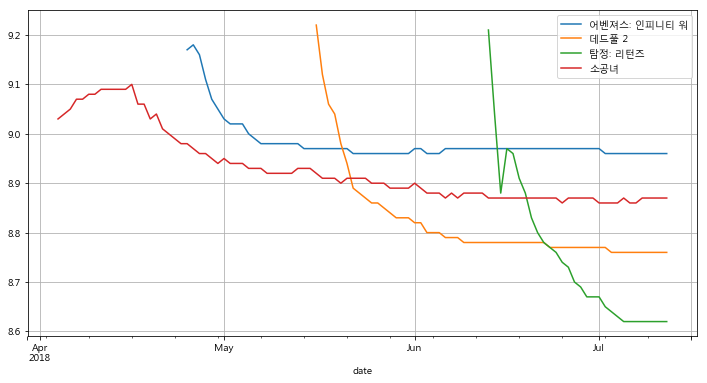

In [53]:
movie_pivot.plot(y=['어벤져스: 인피니티 워','데드풀 2','탐정: 리턴즈','소공녀'],figsize = (12,6))
plt.legend(loc = 'best')
plt.grid()
plt.show()